<a href="https://colab.research.google.com/github/S1MPSID/Mnist/blob/main/Ann%2BCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


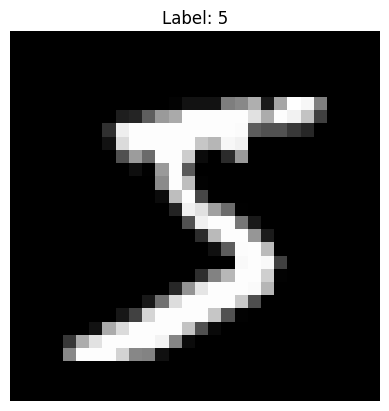

In [3]:
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

ann_model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

ann_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
ann_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [6]:
ann_model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8004 - loss: 7.8901 - val_accuracy: 0.9033 - val_loss: 0.4737
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8904 - loss: 0.4508 - val_accuracy: 0.9220 - val_loss: 0.2944
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9215 - loss: 0.3017 - val_accuracy: 0.9273 - val_loss: 0.2697
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9328 - loss: 0.2643 - val_accuracy: 0.9437 - val_loss: 0.2447
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9394 - loss: 0.2393 - val_accuracy: 0.9467 - val_loss: 0.2559


In [7]:
ann_loss, ann_acc = ann_model.evaluate(x_test, y_test)
print("ANN Test Accuracy:", ann_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2979
ANN Test Accuracy: 0.9377999901771545


CNN

In [8]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print(x_train_cnn.shape)


(60000, 28, 28, 1)


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
cnn_model.fit(
    x_train_cnn,
    y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.8770 - loss: 1.2646 - val_accuracy: 0.9793 - val_loss: 0.0743
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9787 - loss: 0.0673 - val_accuracy: 0.9803 - val_loss: 0.0748
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9837 - loss: 0.0511 - val_accuracy: 0.9835 - val_loss: 0.0600
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9874 - loss: 0.0387 - val_accuracy: 0.9858 - val_loss: 0.0569
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9843 - val_loss: 0.0650


Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = 'mnist_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please ensure the model 'mnist_cnn_model.h5' has been saved by running the model training and saving cells.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


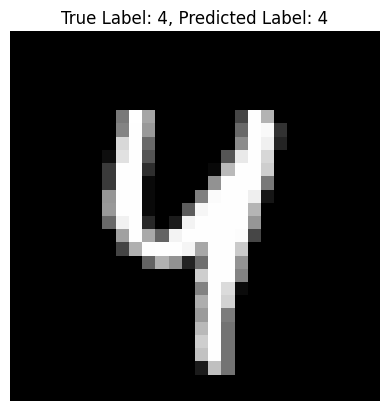

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model # Import load_model

# Load the MNIST data again to ensure x_test and y_test are defined
(_, _), (x_test, y_test) = mnist.load_data()

# Ensure x_test_cnn is defined by reshaping x_test
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Load the trained CNN model from the saved file
try:
    cnn_model = load_model("mnist_cnn_model.h5")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model 'mnist_cnn_model.h5' has been saved by running the model training and saving cells.")
    # Exit or handle the error if the model can't be loaded
    exit()

# Choose an index to visualize a digit from the test set
digit_index = 42 # You can change this index to view different digits

# Get the image and its true label
image_to_predict = x_test_cnn[digit_index]
true_label = y_test[digit_index]

# Reshape for prediction if necessary (already done for x_test_cnn, but good practice)
# The model expects a batch of images, so add an extra dimension
prediction_input = np.expand_dims(image_to_predict, axis=0)

# Make a prediction
predictions = cnn_model.predict(prediction_input)
predicted_label = np.argmax(predictions)

# Display the image and prediction
plt.imshow(image_to_predict.reshape(28, 28), cmap="gray")
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()

In [13]:
# Save the trained CNN model
cnn_model.save("mnist_cnn_model.h5")

In [14]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9790 - loss: 0.0681
CNN Test Accuracy: 0.9824000000953674


In [15]:
cnn_model.save("mnist_cnn_model.h5")
